Index(['question', 'answer', 'date', 'category', 'article_selection', 'title',
       'text', 'summary', 'keypoint', 'url', 'source_domain', 'qa_filter',
       'total_points'],
      dtype='object')
OG length: 16783
resolution
1    7197
0    5605
Name: count, dtype: int64
total_points
14.0    12802
Name: count, dtype: int64
date
2021-06-17    12
2020-09-14    12
2024-04-07    12
2020-08-04    12
2024-06-29    12
              ..
2024-03-13     1
2024-11-14     1
2024-11-21     1
2024-10-12     1
2024-11-05     1
Name: count, Length: 1824, dtype: int64


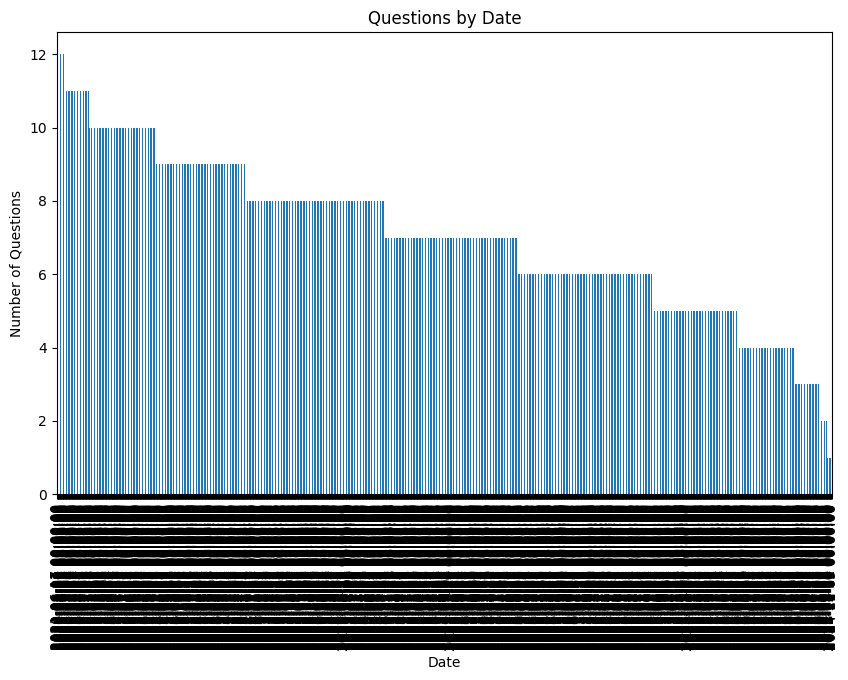

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Load the CSV data
df = pd.read_csv("/fast/nchandak/forecasting/datasets/menge/tf_questions_2020-01-01_2024-12-31.csv")

# Print all the columns names 
print(df.columns)

# Print df length
print("OG length:", len(df))

# only keep rows with the highest total_points (first find it, and then filter)
df = df[df['total_points'] == df['total_points'].max()]

# relevant columns: question, answer, date
# make new column resolution, which is 1 if answer is yes, 0 if answer is no
df['resolution'] = df['answer'].apply(lambda x: 1 if "yes" in x.lower() else 0)

# print resolution value counts
print(df['resolution'].value_counts())

print(df['total_points'].value_counts())


# Convert 'created_date' to datetime (timezone-aware)
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

print(df['date'].value_counts())


In [3]:
# Split into three datasets: train, val, test
df_train = df[df['date'] < pd.Timestamp('2023-01-01')]
df_val = df[(df['date'] >= pd.Timestamp('2023-01-01')) & (df['date'] < pd.Timestamp('2024-07-01'))]
df_test = df[df['date'] >= pd.Timestamp('2024-07-01')]

print(df_train.shape, df_val.shape, df_test.shape)


(9066, 14) (2667, 14) (1069, 14)
